In [1]:
#import modules
%run ../../load_main.py
from Air_Quality_notebooks import utils as utl
from WRFChemToolkit.analysis import statistics as st, aerosols_202 as aer
import matplotlib.pyplot as plt

# PM2.5: 24h average

In [2]:
# Get data
df=pd.read_excel('pm25_changes_tra.xlsx').set_index('Unnamed: 0')

In [3]:
t='_vals'
d = df.filter(regex=t).reset_index().rename({'Unnamed: 0':'sectors'},axis=1).set_index('sectors')

In [4]:
d['base_vals']=d.iloc[0]['base_vals']
d=d.iloc[1: , :].reset_index()
d=d.rename(columns={s: int((float((s.split('_')[0].split('x')[1]))-1)*100+100) for s in d.columns if s.startswith('x')})
d=d.rename({'base_vals':'100'},axis=1)
d=d.set_index('sectors').rename({'TRL':'NCT_TRL','TRH':'NCT_TRH','TRW':'NCT_TRW','DST':'NCT_DST'},axis=0).reset_index()

In [5]:
d=d.melt(id_vars=["sectors"], 
        var_name="scale_factor", 
        value_name="value")

In [6]:
d.scale_factor=d.scale_factor.astype(float)

In [7]:
sec=d.sectors.unique().tolist() 

In [8]:
sec.remove('TRA_ALL')

In [9]:
sec

['NCT_TRL',
 'NCT_TRH',
 'NCT_TRW',
 'NCT_DST',
 'NCR_TRL',
 'NCR_TRH',
 'NCR_TRW',
 'NCR_DST']

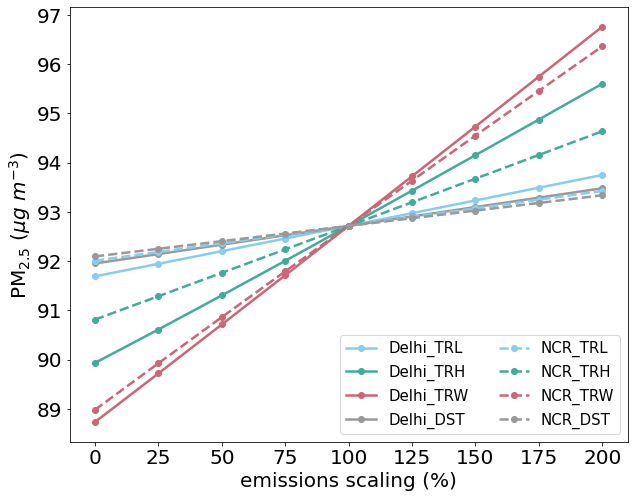

In [10]:
colortra=['#88CCEE','#44AA99','#CC6677',"#999999",'#88CCEE','#44AA99','#CC6677',"#999999"]
labels={'NCT_TRL':'Delhi_TRL','NCT_TRH':'Delhi_TRH','NCT_TRW':'Delhi_TRW','NCT_DST':'Delhi_DST',
        'NCR_TRL':'NCR_TRL','NCR_TRH':'NCR_TRH','NCR_TRW':'NCR_TRW','NCR_DST':'NCR_DST'}
fig, ax = plt.subplots(figsize=[10,8])
for s,i in zip(sec,colortra):
    t = d[d['sectors']==s].sort_values(by='value')
    
    if s.startswith('NCR'):
        ax.plot(t.scale_factor,t.value,'o--',label=labels[s],color=i,linewidth=2.5)
    else:
          ax.plot(t.scale_factor,t.value,'o-',label=labels[s],color=i,linewidth=2.5)
            
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('emissions scaling (%)',fontsize=20) 
    plt.ylabel('PM$_{2.5}$ ($\mu g~m^{-3}$)',fontsize=20) 
plt.legend(loc="lower right",ncol=2,fontsize=15) 

In [11]:
fig.savefig('./fig4b.png', format='png', box_inches="tight",dpi=300)

# PM2.5: hourly values dyno cyle 

In [12]:
pm25h=pd.read_excel('pm25_changes_tra_hour.xlsx').set_index(['sector','hour'])

In [13]:
pm25h

,,base_vals,x0_vals,x0_abs,x0_%,x0.25_vals,x0.25_abs,x0.25_%,x0.5_vals,x0.5_abs,x0.5_%,...,x1.25_%,x1.5_vals,x1.5_abs,x1.5_%,x1.75_vals,x1.75_abs,x1.75_%,x2_vals,x2_abs,x2_%
sector,hour,,,,,,,,,,,,,,,,,,,,,
BASE,0,95.366737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TRL,0,0.000000,94.316544,-1.050192,-1.133422,94.579262,-0.787483,-0.849895,94.841751,-0.524989,-0.566664,...,0.282561,95.890625,0.523889,0.565439,96.152214,0.785485,0.847721,96.412025,1.045286,1.128109
TRH,0,0.000000,92.468895,-2.897849,-3.126084,93.187866,-2.178869,-2.351191,93.910667,-1.456077,-1.571639,...,0.785438,96.819763,1.453020,1.568228,97.544395,2.177658,2.350217,98.272552,2.905811,3.135450
TRW,0,0.000000,91.396675,-3.970075,-4.284453,92.389053,-2.977695,-3.213922,93.378662,-1.988077,-2.145799,...,1.072730,97.350426,1.983699,2.141503,98.342636,2.975900,3.211966,99.333481,3.966736,4.281249
DST,0,0.000000,94.612732,-0.754006,-0.813852,94.800842,-0.565895,-0.610996,94.989922,-0.376818,-0.406803,...,0.200680,95.742859,0.376115,0.406086,95.931564,0.564831,0.609617,96.119087,0.752348,0.811976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCR_TRL,23,0.000000,111.628044,-1.115927,-0.971945,111.909233,-0.834745,-0.726863,112.188644,-0.555337,-0.483508,...,0.239287,113.292992,0.549015,0.477707,113.565086,0.821123,0.714564,113.836349,1.092370,0.950344
NCR_TRH,23,0.000000,109.581779,-3.162190,-2.757372,110.408310,-2.335661,-2.035517,111.209763,-1.534208,-1.336454,...,0.644762,114.218018,1.474044,1.281255,114.939445,2.195474,1.907526,115.656693,2.912722,2.530116
NCR_TRW,23,0.000000,107.093185,-5.650785,-4.986784,108.525955,-4.218013,-3.721910,109.947746,-2.796213,-2.466754,...,1.219527,115.498436,2.754463,2.428138,116.855492,4.111515,3.624551,118.202240,5.458257,4.810955


In [14]:
pm25_valsh=pm25h.filter(regex='vals$', axis=1)

In [15]:
bv=pd.DataFrame(columns=['base_vals','sector','hour']).set_index(['sector','hour'])

for h, new_df in pm25_valsh.groupby(level=1):
    new_df['base_vals']=new_df.iloc[0]['base_vals']
    bv=bv.append(new_df['base_vals'].to_frame())

In [16]:
pm25_valsh['base_vals']=bv['base_vals']

In [17]:
pm25_valsh=pm25_valsh.rename(columns={s: int((float((s.split('_')[0].split('x')[1]))-1)*100+100) for s in pm25h.columns if (s.startswith('x'))})

In [18]:
pm25_valsh=pm25_valsh.rename({'base_vals':'100'},axis=1)

In [19]:
pm25_valsh=pm25_valsh.reset_index().set_index('sector').rename({'DOM':'NCT_DOM','TRA':'NCT_TRA','IPO':'NCT_IPO'},axis=0).reset_index()

In [20]:
pm25_valsh=pm25_valsh.melt(id_vars=["sector",'hour'], 
        var_name="scale_factor", 
        value_name="value")

In [21]:
pm25_valsh.scale_factor=pm25_valsh.scale_factor.astype(float)

In [22]:
sec=pm25_valsh.sector.unique().tolist() 
sec.remove('TRA_ALL')
sec.remove('BASE')

In [23]:
hours=pm25_valsh.hour.unique().tolist()

In [24]:
pm25_valsh

,sector,hour,scale_factor,value
0,BASE,0,100.0,95.366737
1,TRL,0,100.0,95.366737
2,TRH,0,100.0,95.366737
3,TRW,0,100.0,95.366737
4,DST,0,100.0,95.366737
...,...,...,...,...
2155,NCR_TRL,23,200.0,113.836349
2156,NCR_TRH,23,200.0,115.656693
2157,NCR_TRW,23,200.0,118.202240
2158,NCR_DST,23,200.0,113.666595


In [25]:
sec

['TRL', 'TRH', 'TRW', 'DST', 'NCR_TRL', 'NCR_TRH', 'NCR_TRW', 'NCR_DST']

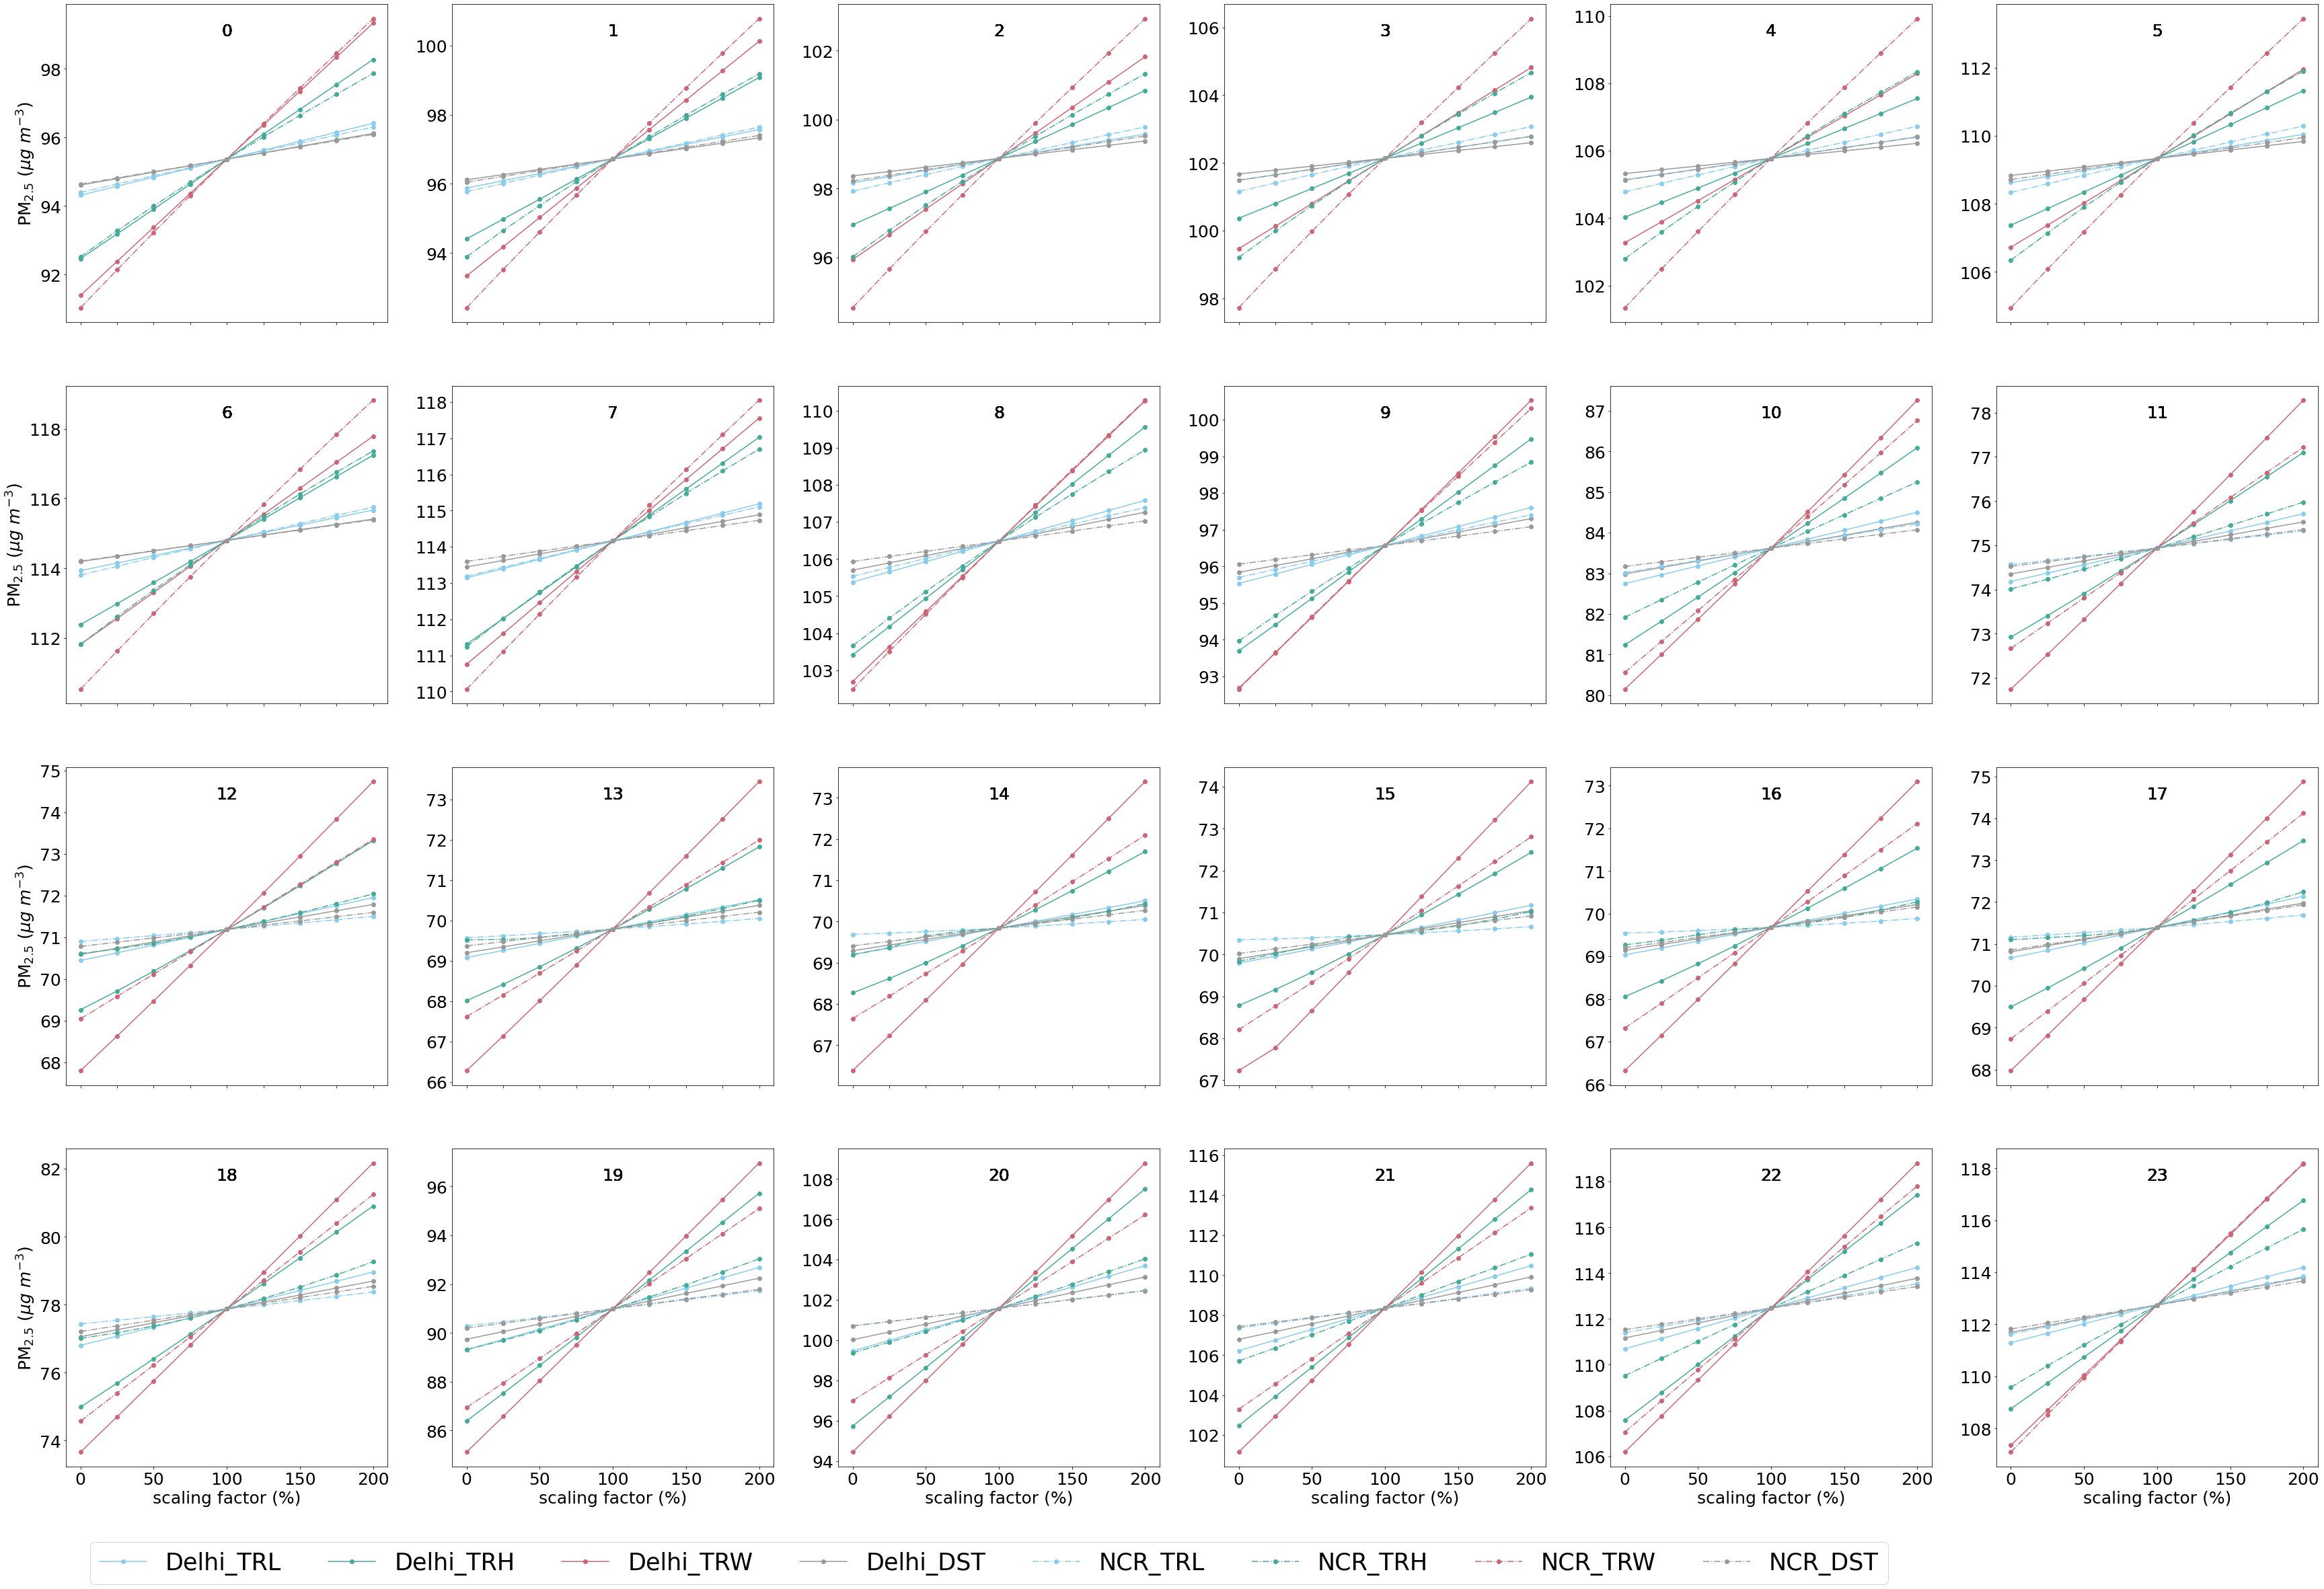

In [26]:
colors=['#88CCEE','#44AA99','#CC6677',"#999999",'#88CCEE','#44AA99','#CC6677',"#999999"]
labels={'TRL':'Delhi_TRL','TRH':'Delhi_TRH','TRW':'Delhi_TRW','DST':'Delhi_DST',
        'NCR_TRL':'NCR_TRL','NCR_TRH':'NCR_TRH','NCR_TRW':'NCR_TRW','NCR_DST':'NCR_DST'}
fig, axes = plt.subplots(4,6,figsize=(60,40))
for h,ax in zip(hours,fig.axes): 
    for s,i in zip(sec,colors):
        t = pm25_valsh[(pm25_valsh['sector']==s) & (pm25_valsh['hour']==h)].sort_values(by='scale_factor')
        
        if s.startswith('NCR'):
            ax.plot(t.scale_factor,t.value,'o-.',label=labels[s],color=i)
        else:
            ax.plot(t.scale_factor,t.value,'o-',label=labels[s],color=i)
        
        ax.text(.5,.9,h,
        horizontalalignment='center',
        transform=ax.transAxes,fontsize=25)
        ax.tick_params(axis='y', which='major', labelsize=25)

for i,ax in zip(range(0,24),fig.axes):
    if i in [18,19,20,21,22,23]: 
        ax.set_xlabel('scaling factor (%)', fontsize=25)
        ax.tick_params(axis='x', which='major', labelsize=25)
    else:
         ax.set_xticklabels([])
    
    if i in [0,6,12,18]: 
          ax.set_ylabel('PM$_{2.5}$ ($\mu g~m^{-3}$)', fontsize=25)

plt.legend( bbox_to_anchor=(-0.3,-0.2),fontsize=35,ncol=8, loc='bottom left')

In [27]:
fig.savefig('./figS8.pdf', format='pdf', box_inches="tight",dpi=300)